In [ ]:
pip install shap flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 6.3 MB/s eta 0:00:00


Note: If you want to re-run the AutoML code, you may need to downgrade NumPy and restart the session. After restarting, re-import NumPy. This step is only necessary if you intend to re-run the AutoML code.

**------self note------**
in a runtime session, default numpy.2.0.2, (2025.04.09)
**------end note------**

In [ ]:
# Downgrade NumPy and then restart the session by clicking the Runtime tab
!pip uninstall -y numpy
!pip install numpy==1.26.3

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.9 MB/s eta 0:00:00


In [ ]:
from flaml import AutoML

**------self note------**

I first tried [1]-[2]-[3], but resulted error. Restart Runtime session. Then rerun [1]-[2]-[3] successfully. Gemini explained that current runtime may still remain old package of software environment. Just renew a runtime session will solve. Similar as reboot a PC after sw update.

**------end note------**

In [ ]:
import ipywidgets as widgets # ipywidgets are interactive elements in Jupyter environment
import matplotlib.pyplot as plt # matlab style interface for ploting in python
import numpy as np
import pandas as pd
import seaborn as sns
import shap # the prediction model interpreting tool SHapley...

# from flaml import AutoML
from sklearn.cluster import KMeans # algorithm to cluster data into K distinct groups
from sklearn.datasets import load_wine # Wine recognition dataset used for classification jobs
from sklearn.decomposition import PCA # Principal Component Analysis (PCA) reduce features into a new, smaller set of variables called Principal Components.
from sklearn.ensemble import ( # Below, sklearn.ensemble combines the four models into a more robust/accurate prediction model.
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    RandomForestClassifier,
    RandomForestRegressor,
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

# **Assignment: Understanding House Price Prediction Using Regression Models**

**Objective:**
The goal of this assignment is to explore the relationship between house prices and various features
using exploratory data analysis (EDA) and regression models. By the end of the assignment, students
will be able to visualize data, apply regression techniques, and compare model performances. Before
we get started, we import all the packages used in this problem set.


# **Part 1: Dataset Overview and Preprocessing**

1.**Dataset Overview**

The dataset contains house sale prices and various features such as:

**date:** The date the house was sold.

**price:** Target variable representing house sale prices.

**bedrooms:** Number of bedrooms.

**bathrooms:** Number of bathrooms.

**sqft_living:** Square footage of the living space.

**sqft_lot:**Square footage of the lot.

**floors:** Number of floors.

**waterfront:** Indicator if the house is located on a waterfront.

**view:** View rating of the house.

**condition:** Condition rating of the house.

**sqft_above:** Square footage of the living space above ground.

**sqft_basement:** Square footage of the basement.

**yr_built:** Year the house was built.

**yr_renovated:** Year of renovation (0 if never renovated).

**street:** Street address of the property. (NaN)

**city:** City where the house is located. (NaN)

**statezip:** State and zip code. (NaN)

**country:** Country of the property. (NaN)

The dataset includes both numerical and categorical features.

Check the first few rows of the dataset:

In [ ]:
df = pd.read_csv( # pandas read cvs source data from ("_url_") into dataframe "df".
    "https://raw.githubusercontent.com/chansen776/MBA-ML-Course-Materials/refs/heads/main/Data/house_prices.csv"
)
print(df.head()) # print the header and first 5 rows from df.

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

2.**Feature Engineering & Encoding Categorical Data**

Convert categorical features (city, statezip, street) into numerical representations.

Apply one-hot encoding where necessary:

**------self note------**

*Country*

If there more than 1 country, perform one-hot encoding:

    df_encoded = pd.get_dummies(df_encoded, columns=['country'], prefix='country')

If there's only one country, it might not be informative for modeling:

    # Leave it as is (add no variance = make no difference)

*Street*

has a very large number of unique values, One-hot encoding result in a very high-dimensional, sparse dataset.

<u>Option 1</u> One-Hot Encoding with caution：

    df_encoded = pd.get_dummies(df_encoded, columns=['street'], prefix='street')

<u>Option 2</u> Frequency Encoding (Count the occurrences of each street)：

    street_counts = df['street'].value_counts()
    df_encoded['street_freq'] = df['street'].map(street_counts)
    # Drop the original 'street' column
    df_encoded.drop('street', axis=1, inplace=True)

<u>Option 3</u> Target Encoding (Encode based on the target variable 'price'). This method can be more informative,  but must be careful to avoid data leakage especially during cross-validation:

    street_means = df.groupby('street')['price'].mean()
    df_encoded['street_target'] = df['street'].map(street_means)
    # Drop the original 'street' column
    df_encoded.drop('street', axis=1, inplace=True)

**------end note------**


In [ ]:
df = pd.get_dummies(df, columns=["city", "statezip"], drop_first=True)

**------self note------**

To print(df.head())again to see change: 135 columns instead of 19.


In [ ]:
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  ...  statezip_WA 98155  \
0     1.5           0     0          3  ...              False   
1     2.0           0     4          5  ...              False   
2     1.0           0     0          4  ...              False   
3     1.0           0     0          4  ...              False   
4     1.0           0     0          4  ...              False   

   statezip_WA 98166  statezip_WA 98168  statezip_WA 98177 statezip_WA 98178  \
0              False              Fa

3.**Feature Scaling**

Important: When standardizing data, ensure that the scaling is performed <u>only on the training data</u> to prevent data leakage.

The mean and standard deviation should be calculated from the training data and then applied to both the training and test sets.

In [ ]:
# Define predictor and target variable
X = df[["sqft_living"]] # [[...]] denotes a DataFrame, so use upper case X to denote.
y = df["price"] # [...] denotes a series, so use a lower case y to denote.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # set random_state any integer ensures that data split same way each time and same result is reproduced.
)

# Initialize the StandardScaler, scaling data to its variance.
scaler = StandardScaler()

# Fit scaler only on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # No fit() on test data to avoid leakage.

# **Part 2: Exploratory Data Analysis (EDA)**

**Visualization**

1.Scatter Plot of sqft_living vs. price



**------self note------**

add code to plot a linear regression line sqft_living vs price and sqft_basement vs price. Becareful with definitions of new variables for not interupting later codes.

**------end note------**

In [ ]:
# Extract the data
x_lv = df["sqft_living"]
x_ba = df["sqft_basement"]
y_pr = df["price"]

# Calculate the parameters of the sqft_living vs price linear regression line (slope and intercept)
# np.polyfit(x_lv, y_pr, 1) fits a polynomial of degree 1 (a line)
slope_lvpr, intercept_lvpr = np.polyfit(x_lv, y_pr, 1)

# Generate y-values for the sqft_living vs price regression line
# Create x-values spanning the range of the data
x_lv_line = np.array([x_lv.min(), x_lv.max()])

# Calculate the corresponding sqft_living vs price y-values using the line equation: y = mx + b
y_lv_pr_line = slope_lvpr * x_lv_line + intercept_lvpr

# Calculate the parameters of the sqft_basement vs price linear regression line (slope and intercept)
# np.polyfit(x_ba, y_pr, 1) fits a polynomial of degree 1 (a line)
slope_bapr, intercept_bapr = np.polyfit(x_ba, y_pr, 1)

# Generate y-values for the sqft_basement vs price regression line
# Create x-values spanning the range of the data
x_ba_line = np.array([x_ba.min(), x_ba.max()])

# Calculate the corresponding sqft_basement vs price y-values using the line equation: y = mx + b
y_ba_pr_line = slope_bapr * x_ba_line + intercept_bapr

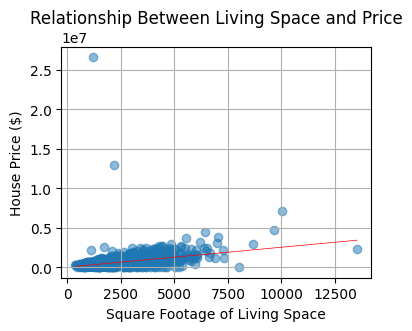

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(df["sqft_living"], df["price"], alpha=0.5)
plt.plot(x_lv_line, y_lv_pr_line, color='red', linewidth=0.5, label=f'Linear Regression') # Added label and made line red
plt.xlabel("Square Footage of Living Space")
plt.ylabel("House Price ($)")
plt.title("Relationship Between Living Space and Price")
plt.grid(True)
plt.show()

2.**Task:**Create a scatter plot of sqft_basement vs. price.

You have code for the scatter plot of sqft_living vs. price above.

The variable name you need is sqft_basement.

You can use ChatGPT or any other LLM to ask how to modify the provided code.

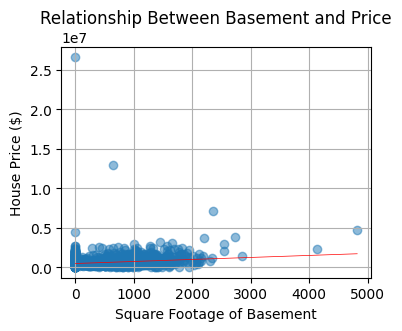

In [ ]:
# Insert code and plot here for Basement vs Price
plt.figure(figsize=(4, 3))
plt.scatter(df["sqft_basement"], df["price"], alpha=0.5)
plt.plot(x_ba_line, y_ba_pr_line, color='red', linewidth=0.5, label=f'Linear Regression') # Added label and made line red
plt.xlabel("Square Footage of Basement")
plt.ylabel("House Price ($)")
plt.title("Relationship Between Basement and Price")
plt.grid(True)
plt.show()

In [ ]:
# Calculate the correlation coefficient between 'sqft_living' and 'price'
corr_liv_pri = df['sqft_living'].corr(df['price'])

# Print the result
print(f"The correlation coefficient between sqft_living and price is: {corr_liv_pri}")

# Calculate the correlation coefficient between 'sqft_living' and 'price'
corr_bas_pri = df['sqft_basement'].corr(df['price'])

# Print the result
print(f"The correlation coefficient between sqft_basement and price is: {corr_bas_pri}")

The correlation coefficient between sqft_living and price is: 0.43041002543262824
The correlation coefficient between sqft_basement and price is: 0.21042657177482943


3.**Question:** Which feature do you think has a stronger correlation with price: sqft_living or sqft_basement? Calculate the correlation coefficient for both and explain your reasoning.

**Frank Answer**

Intuitively, sqft_living and price should have stronger correlation because that's what homebuyers do. See from plot, linear line sf-live vs price seems more center located among dots, whereas linear line sf-base vs price seems more skewed down (more blue data shades above red line).

Calculation results tell same story:

corr_liv_pri = 0.43

corr_bas_pri = 0.21



# **Part 3: Building Regression Models**

1.Linear Regression (Example Given)

2.Train a **Linear Regression model** using sqft_living as the predictor.

3.Evaluate the model using R-squared (R²), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)

In [ ]:
# define predictor and target variables
X = df[["sqft_living"]] # X is a DataFrame of 1 variable.
y = df["price"]

# split dataset (X,y) into train and test in 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # tried with 100 randomness and restuled in R²=0,46, MAE=178184 RMSE=76845926073
)

# define prediction model and train it with data X and y
model = LinearRegression()
model.fit(X_train, y_train)

# predict target variable using trained model above.
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R²: 0.029065410341410414
MAE: 225375.25345857345
RMSE: 990204087727.1417


**Random Forest and Gradient Boosting Regression**

Below is the code for Random Forest and Gradient Boosting Regression. Do not worry about understanding every part of the code initially.


In [ ]:
# Random Forest Regressor, here use scaled X_train to train model; can also use non-scaled X_train.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #  n_estimators = number of trees built in the random forest.
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Results:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print("-----model seperator-----")

# Gradient Boosting Regressor, here use scaled X_train to train model; can also use non-scaled X_train.
gb_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, random_state=42 # n_estimators is numenr of trees or stages of boost; learning_rate is λ, the contribution of each tree/stage to the final prediction.
)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Results:")
print("R²:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

Random Forest Results:
R²: 0.005948601777127971
MAE: 233146.1318696576
RMSE: 1006866.2673542678
-----model seperator-----
Gradient Boosting Results:
R²: 0.006307078747391892
MAE: 224314.3204614628
RMSE: 1006684.7018355782


# **Your Task:**

1. Explain what the provided code is doing. You can use ChatGPT or any LLM to help you understand it.

**Frank Explain**

RandomForest model samples 100 trees in each random forest, trained itself by scaled X_train and origal y_train, then predict y by scaled X-test, then produced R^2, MAE, and RMSE between prediction and y_test data.

GradientBoost model builds 100 training stages (trees) with learning rate (weight of each stage) of 0.1, trained itself by scaled X_train and origal y_train, then predict y by scaled X-test, then produced R^2, MAE, and RMSE between prediction and y_test data.

Compare the Results:

2. Which model performed better based on the evaluation metrics (R², MAE, RMSE)?

**Frank Answer**

by R²: gb is better

by MAE: rf is better

by RMSE: gb is margally better

Overall, gb is better than rf, but only by a marginal difference.

3. Consider the presence of outliers in the scatter plot from the beginning of the assignment.

**Frank Answer**

There are clearly a few outliers on the upper-left section.

4. Which evaluation metric (RMSE, R², or MAE) do you think is better for this example?

**Frank Answer**

Overall, RMSE and R² are better than MAE in this example for that they produce some consistency like 2-to-1 vote.

5. Explain your reasoning.

Think about how each metric handles outliers.

You can use ChatGPT to help think about the trade-offs.

**Hint:** We have used this example throughout most of Notes 1. If you set the seed to the same value used in those notebooks, you can compare your results.

**Frank Answer**

Consider the outliers, RMSE is better indicator because it stresses the large error/outlier. MAE down plays the outliers, comparing to RMSE. R² also stresses on outliers when indicating the portion of variance explanable.

# **Bonus Question:**

1.Experiment by adding more features (e.g., bedrooms, bathrooms, sqft_basement).

2.Compare which model performs best with multiple predictors.

//

tbd

\\
---

In [ ]:
print("3 MODELs: predeict pricen by number of bedrooms")
print("------------------------------------------------")

# define predictor and target variables
X = df[["bedrooms"]] # X is a DataFrame of 1 variable.
y = df["price"]

# split dataset (X,y) into train and test in 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # tried with 100 randomness and restuled in R²=0,46, MAE=178184 RMSE=76845926073
)

# define prediction model and train it with data X and y
model = LinearRegression()
model.fit(X_train, y_train)

# predict target variable using trained model above.
y_pred = model.predict(X_test)

print("Linear Regression Results")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

print("-----model seperator-----")

# Random Forest Regressor, here use scaled X_train to train model; can also use non-scaled X_train.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #  n_estimators = number of trees built in the random forest.
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Results:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print("-----model seperator-----")

# Gradient Boosting Regressor, here use scaled X_train to train model; can also use non-scaled X_train.
gb_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, random_state=42 # n_estimators is numenr of trees or stages of boost; learning_rate is λ, the contribution of each tree/stage to the final prediction.
)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Results:")
print("R²:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))


3 MODELs: predeict pricen by number of bedrooms
------------------------------------------------
Linear Regression Results
R²: 0.00640244462143158
MAE: 268696.39072586654
RMSE: 1013316830372.1782
-----model seperator-----
Random Forest Results:
R²: 0.005948601777127971
MAE: 233146.1318696576
RMSE: 1006866.2673542678
-----model seperator-----
Gradient Boosting Results:
R²: 0.006307078747391892
MAE: 224314.3204614628
RMSE: 1006684.7018355782


In [ ]:
print("3 MODELs: predeict pricen by number of bathrooms")
print("------------------------------------------------")

# define predictor and target variables
X = df[["bathrooms"]] # X is a DataFrame of 1 variable.
y = df["price"]

# split dataset (X,y) into train and test in 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # tried with 100 randomness and restuled in R²=0,46, MAE=178184 RMSE=76845926073
)

# define prediction model and train it with data X and y
model = LinearRegression()
model.fit(X_train, y_train)

# predict target variable using trained model above.
y_pred = model.predict(X_test)

print("Linear Regression Results")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

print("-----model seperator-----")

# Random Forest Regressor, here use scaled X_train to train model; can also use non-scaled X_train.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #  n_estimators = number of trees built in the random forest.
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Results:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print("-----model seperator-----")

# Gradient Boosting Regressor, here use scaled X_train to train model; can also use non-scaled X_train.
gb_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, random_state=42 # n_estimators is numenr of trees or stages of boost; learning_rate is λ, the contribution of each tree/stage to the final prediction.
)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Results:")
print("R²:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

3 MODELs: predeict pricen by number of bathrooms
------------------------------------------------
Linear Regression Results
R²: 0.02422981945263125
MAE: 249844.38866814913
RMSE: 995135647397.221
-----model seperator-----
Random Forest Results:
R²: 0.005948601777127971
MAE: 233146.1318696576
RMSE: 1006866.2673542678
-----model seperator-----
Gradient Boosting Results:
R²: 0.006307078747391892
MAE: 224314.3204614628
RMSE: 1006684.7018355782


**------self note------**

Surprisingly, linear regression model predicts better from both bedrooms and bathrooms. This is due to the discrete (coarse) nature of the room numbers.

Another surprise is that bathroom can tell much clearer prediction on price than bedrooms. This is probably because bathroom (bathroom is luxury) provide much bigger variance than bedrooms (bedroom is necessity).

**------end note------**

#  Multi-class Classification

In many predictive modeling tasks, the goal is to classify observations into distinct categories based on their characteristics. When there are only two possible categories (e.g., "Yes" or "No," "Up" or "Down"), the problem is called binary classification. However, when there are **more than two possible categories**, we use **multi-class classification**.

An automobile company is expanding into new markets with its existing products. Market research shows that customer behavior in these markets mirrors the existing one.

Previously, the sales team classified customers into four segments (A, B, C, D) using rule-based methods based on demographics, spending behavior, and past purchases. To scale this approach, the company now requires a multi-class machine learning model to automate customer segmentation for new market entrants.

The A, B, C, D segmentation represents customer tiers in the automobile market:

* A (Loyal Customers) – High-spending, repeat buyers, likely to prefer premium or luxury cars.
* **B (Regular Customers)** – Moderate spenders, consistent buyers, often opting for mid-range vehicles.
* C (Occasional Customers) – Low-spending, infrequent buyers, likely considering budget-friendly or used cars.
* **D (Potential Customers)** – Least engaged, may be first-time buyers or exploring options with low commitment.

**Your task** is to develop a predictive solution that accurately assigns new customers to the appropriate segment, enabling data-driven decision-making and scalable outreach.




### Dataset_overview:

Dataset Overview
The dataset contains information about automobile customers. Each record represents an individual customer with various demographic and behavioral attributes. The key variables in the dataset include:

* **ID**: Unique identifier for each customer.
Gender: Customer's gender.
* **Ever_Married**: Indicates if the customer has ever been married.
* **Age**: Customer's age.
* **Graduated**: Indicates whether the customer is a graduate.
* **Profession**: Customer's occupation.
* **Work_Experience**: Number of years the customer has worked.
* **Spending_Score**: Indicates spending behavior, classified as Low, Average, or High based on purchasing patterns.
* **Family_Size**: Number of family members in the household.

___above are demographical features___

___below is a behaviorial classiification___

* **Hidden_Customer_Category**: An internally assigned, anonymized classification of customers based on undisclosed criteria, such as spending behavior, or engagement patterns.

**Discussion Question: Binary vs. Multi-Class Classification** prior to predictive tasks.

If you were primarily interested in predicting who your potential customers are—perhaps so you can target them with incentives to encourage engagement—would you prefer a binary classification model (Potential Customer: 0/1) or a multi-class classification model that categorizes users into the four segments (A, B, C, D)? You could use ChatGPT to help you think these tradeoffs.

**Answer:**

Binary is good enough and even better in that it tells a direct, clear, and actionable answer to an essentially binary question (Y/N). It's like the situation of investment evaluation. Youd just want to know to invest or not today, but don't want to learn how much it may make you tomorrow.


## Task 1: Data Preprocessing and Exploration

### **1.1 Load and Explore the Dataset**  
- Load the **train and test datasets**.  
- Display summary statistics using `.describe()` and `.info()`.  



In [ ]:
# change to your file directory
automobile_customers = pd.read_csv(
    "https://raw.githubusercontent.com/chansen776/MBA-ML-Course-Materials/refs/heads/main/Data/automobile_customer_segmentation.csv"
)
automobile_customers.info() # gives index (row lables) and column summary (name, non-null counts, and DType)
automobile_customers.describe() # generates descriptive statistics for the columns in DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8570 entries, 0 to 8569
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8500 non-null   float64
 1   Gender                    8570 non-null   object 
 2   Ever_Married              8453 non-null   object 
 3   Age                       8478 non-null   float64
 4   Graduated                 8481 non-null   object 
 5   Profession                8570 non-null   object 
 6   Work_Experience           8478 non-null   float64
 7   Spending_Score            8570 non-null   object 
 8   Family_Size               8471 non-null   float64
 9   Hidden_Customer_Category  8479 non-null   object 
 10  Segmentation              8570 non-null   object 
dtypes: float64(4), object(7)
memory usage: 736.6+ KB


,ID,Age,Work_Experience,Family_Size
count,8500.000000,8478.000000,8478.000000,8471.000000
mean,463544.991412,45.363883,4.197924,3.091134
std,2576.241780,16.155434,3.987977,1.625129
min,458985.000000,18.000000,0.000000,1.000000
25%,461420.000000,33.000000,1.000000,2.000000
50%,463584.500000,42.000000,2.000000,3.000000
75%,465730.000000,55.000000,8.000000,4.000000
max,467973.000000,89.000000,14.000000,9.000000


In [ ]:
automobile_customers.isnull().sum() # isnull() finds the data rows that contains "null", or miss a value, and returns a boolean true. Otherwise, false. Sum() adds all true-s as 1s.
automobile_customers.dropna(inplace=True) # dropna() drops the rows with missing values from the dataset.

**Question:** What are the two code lines above doing? (You could use your favorite LLM to help).

**Answer:**

isnull( ) finds the data rows that contains "null", or miss a value. When there is a missing value, it returns boolean true. When there isn't, it returns boolean false.

sum( ) adds up the boolean trues (as 1s) and false (as 0s). So the sum is the number of missing values.

dropna(inplace=True) drops the rows with missing values from the dataset, resulting in a modified dataset while original dataset is no longer exist. If implace=false, it creates a new dataset while keeping the original one.



### **1.2 Visualizing Categorical Variables Using Bar Plots**  

- Use **bar plots** to visualize the distribution of categorical variables.  
- Focus on key categorical features such as **Gender, Ever_Married, Graduated, Profession, Spending_Score, Hidden_Customer_Category, and Segmentation**.  
- Bar plots help understand the frequency of each category and identify potential imbalances.  


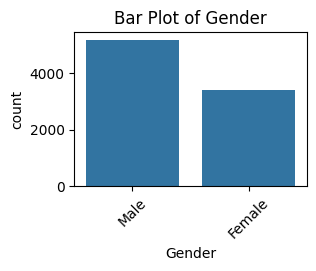

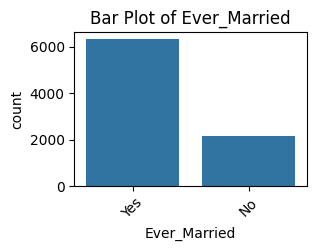

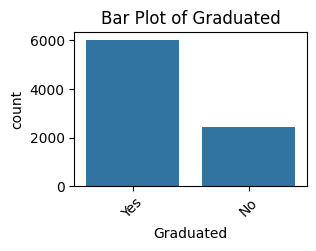

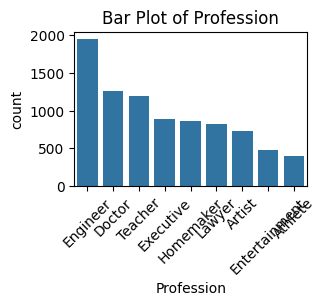

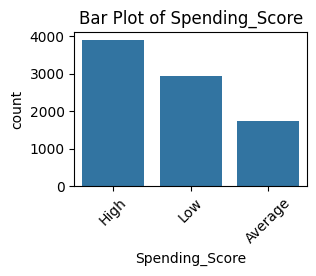

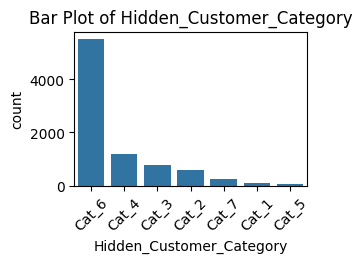

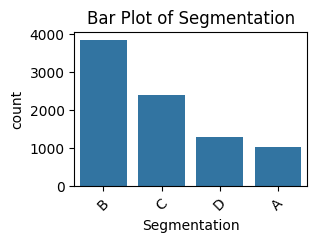

In [ ]:
# Generate bar plots for each categorical column
categorical_cols = [
    "Gender",
    "Ever_Married",
    "Graduated",
    "Profession",
    "Spending_Score",
    "Hidden_Customer_Category",
    "Segmentation",
]

for col in categorical_cols:
    plt.figure(figsize=(3, 2))
    sns.countplot(
        x=automobile_customers[col],
        order=automobile_customers[col].value_counts().index,
    )
    plt.title(f"Bar Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

**------self note------**

Instead of plot vertical layout, try to plot in a grid that layout figures in rows. figsize is adjusted dynamically along the browser screen size.

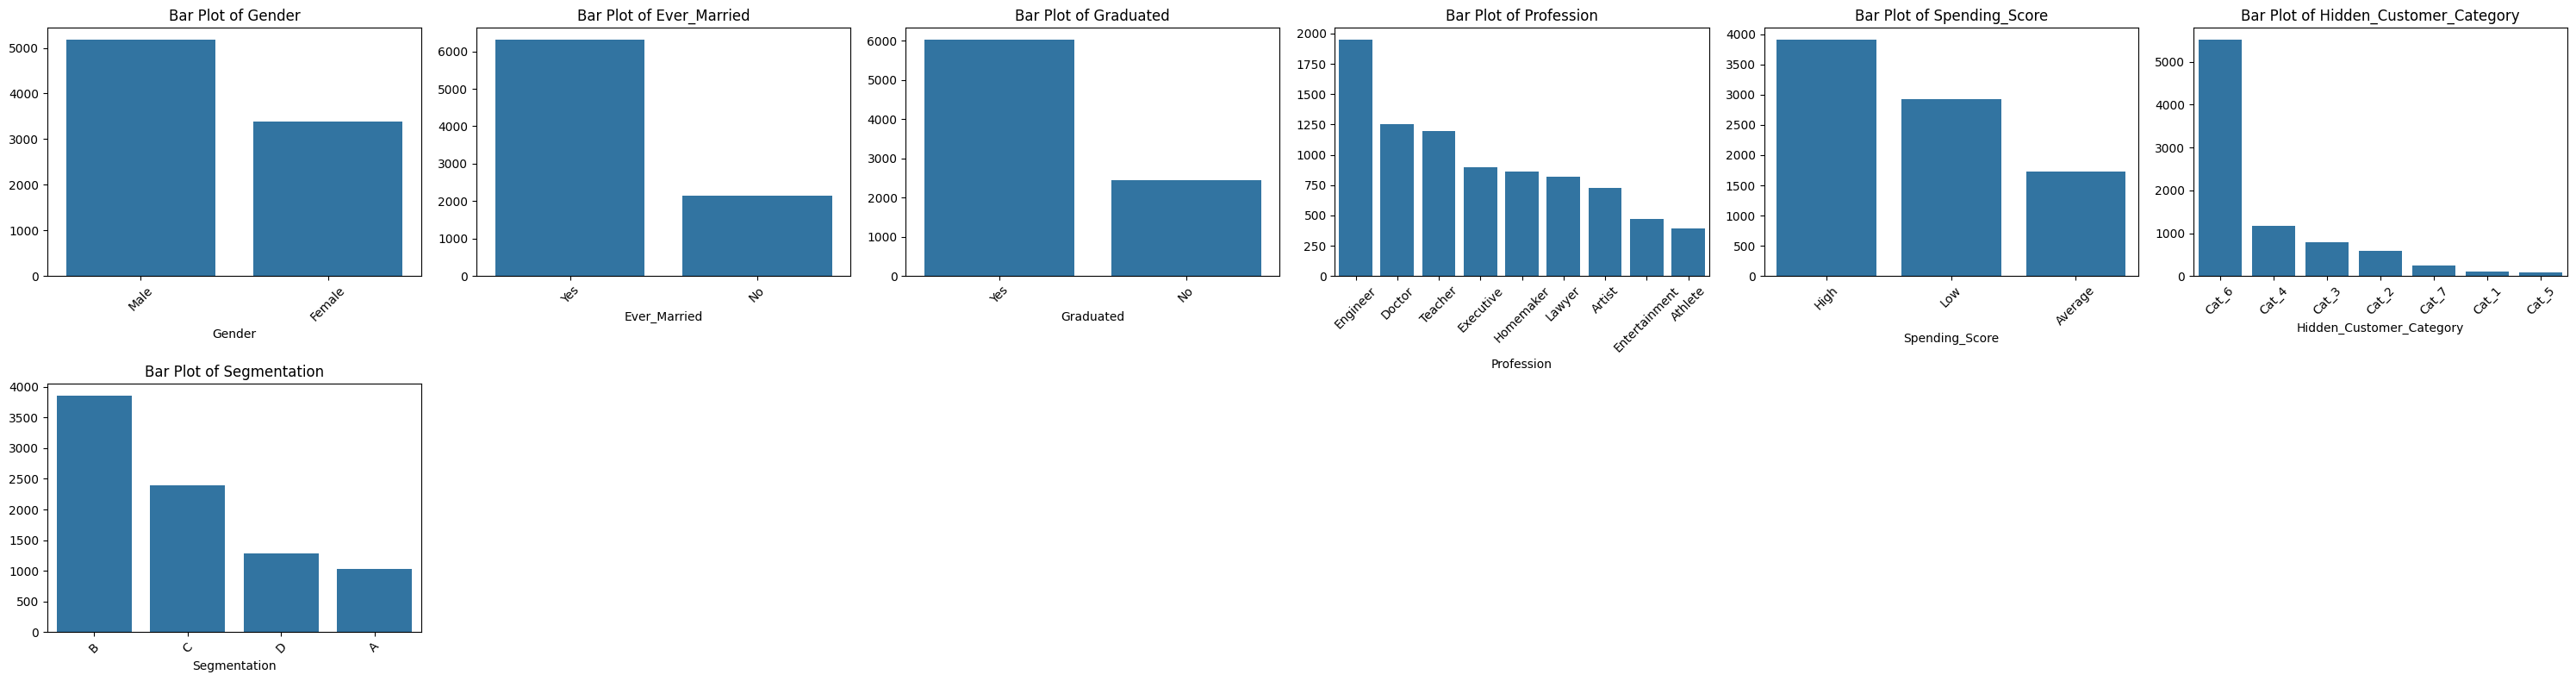

In [ ]:
# Generate bar plots for each categorical column
categorical_cols = [
    "Gender",
    "Ever_Married",
    "Graduated",
    "Profession",
    "Spending_Score",
    "Hidden_Customer_Category",
    "Segmentation",
]

num_plots = len(categorical_cols)
if num_plots == 0:
    print("No categorical columns found to plot.")
else:
    # --- Determine Grid Size ---
    # Set the desired number of columns and rows in the grid
    ncols = 6 # You can adjust this number
    nrows=int(num_plots/ncols)+1 # Or, calculate number of rows (using ceiling division, "nrows=math.ceil(num_plots/ncols) OR "int(...)+1"

    # --- Create Subplots ---
    # Increase figure size to accommodate multiple plots
    # Adjust multipliers (e.g., 5 and 4) as needed for your screen/preference
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))

    # Flatten the axes array for easy iteration, handles cases where nrows=1 or ncols=1
    axes = axes.flatten()

    # --- Loop and Plot on Subplots ---
    for i, col in enumerate(categorical_cols):
        ax = axes[i] # Get the current subplot axis
        sns.countplot(
            x=automobile_customers[col],
            order=automobile_customers[col].value_counts().index,
            ax=ax # <<< Tell seaborn which axis to use
        )
        ax.set_title(f"Bar Plot of {col}") # Use ax.set_title for subplots
        # Rotate labels on the specific axis
        ax.tick_params(axis='x', rotation=45)
        # Optional: Set x-label (countplot usually uses the column name)
        # ax.set_xlabel(col)
        # Optional: Clear y-label if not needed
        ax.set_ylabel('')


    # --- Clean up Empty Subplots ---
    # Hide any unused subplots if num_plots doesn't perfectly fill the grid
    for j in range(num_plots, len(axes)):
        axes[j].axis('off') # Turn off the axis for empty plots

    # --- Adjust Layout and Show ---
    plt.tight_layout() # Adjusts spacing between subplots to prevent overlap
    plt.show()         # Show the entire figure with all subplots at once

**self note**

there are

more college graduated, married, male engineers/doctors/teachers

than

non-college, never married, female athlets/entertainers/artists.

### **1.3 Discover Correlation with Other Variables**  
Investigate whether certain **demographic or behavioral attributes** are strong predictors of segmentation.


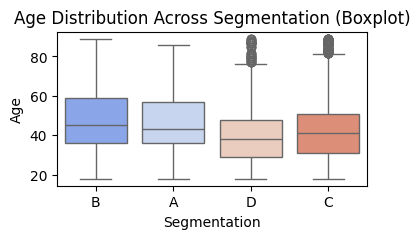

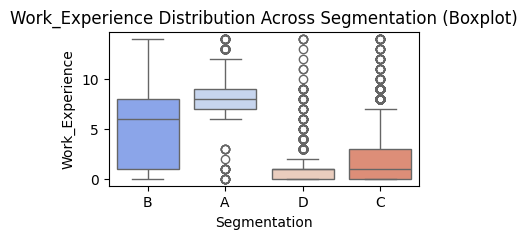

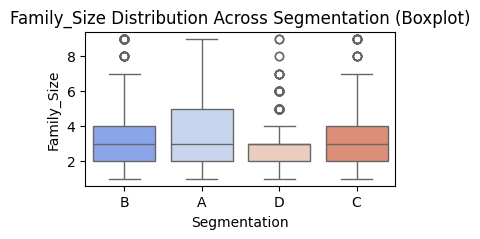

In [ ]:
# Boxplots for Numerical Features vs. Segmentation
# Boxplots
numerical_cols = ["Age", "Work_Experience", "Family_Size"]

for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x="Segmentation", y=col, data=automobile_customers, palette="coolwarm", hue="Segmentation", legend=False)
    plt.title(f"{col} Distribution Across Segmentation (Boxplot)")
    plt.xlabel("Segmentation")
    plt.ylabel(col)
    plt.show()

**------self note------**

Original code:

    sns.boxplot(x="Segmentation", y=col, data=automobile_customers, palette="coolwarm")

resulted in warning:

&nbsp;&nbsp;&nbsp;&nbsp;Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

&nbsp;&nbsp;&nbsp;&nbsp;Assign the `x` variable to `hue`, and

&nbsp;&nbsp;&nbsp;&nbsp;set `legend=False` for the same effect.

Added:

    hue="Segmentation", legend=False

to resolve.

**------end note------**

**------self note------**

The college graduated, married, male engineers/doctors/teachers

vs

non-college, never married, female athlets/entertainers/artists

are more likely

**mid 30s - late 50s, mid-career, and from small-median housholds**

**------end note------**

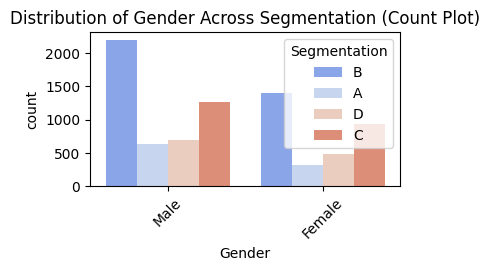

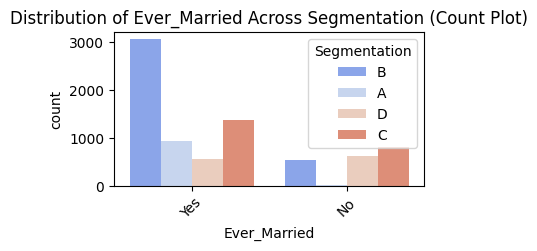

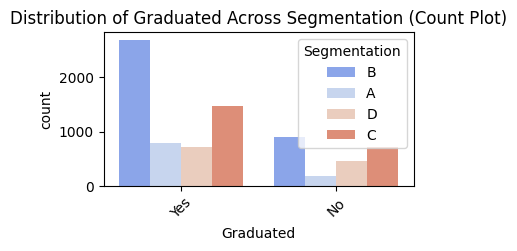

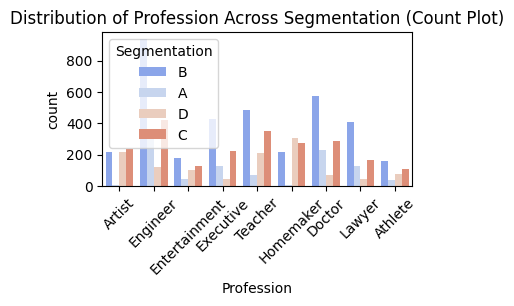

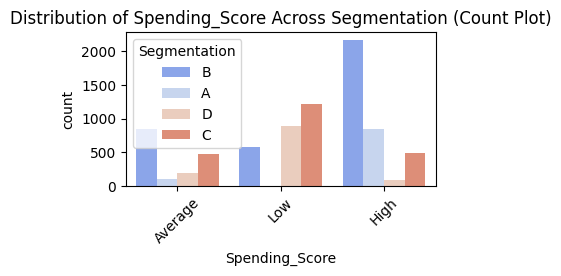

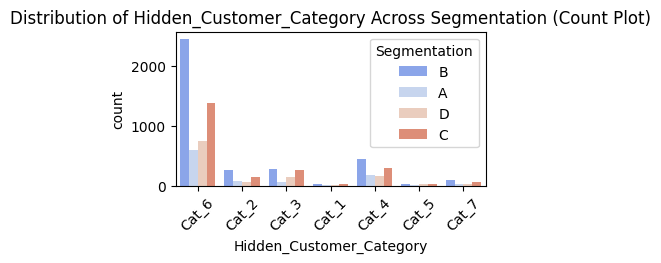

In [ ]:
# Countplots for Categorical Features vs. Segmentation
# Countplots
categorical_cols = [
    "Gender",
    "Ever_Married",
    "Graduated",
    "Profession",
    "Spending_Score",
    "Hidden_Customer_Category",
]

for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    sns.countplot(
        x=col, hue="Segmentation", data=automobile_customers, palette="coolwarm"
    )
    plt.title(f"Distribution of {col} Across Segmentation (Count Plot)")
    plt.xticks(rotation=45)
    plt.legend(title="Segmentation")
    plt.show()

**------self note------**

The college graduated, married, male engineers/doctors/teachers vs non-college, never married, female athlets/entertainers/artists are

1) more likely in mid 30s - late 50s, mid-career, and from small-median housholds, and

2) unlikely homemakers and low spending lifestyle.

**------send note------**

**Question:** Analyze and Interpret Data Insights
1. Summarize your key insights from the dataset, focusing on patterns or trends that could influence modeling decisions for customer segmentation.

2. Here, we examine the full dataset before modeling. Is there a potential issue with analyzing the entire dataset before constructing models based on these insights? What risks might arise from this approach?

**Answer:**

The auto customers can be stereotyped as college graduated, married, male engineers/doctors/teachers instead of non-college, never married, female athlets/entertainers/artists. They are mostly in their mid 30s - late 50s, mid-career, and from small-median housholds with high spending lifestyle, and very unlikely to be homemakers.

So doing all feature analysis can provide us more detail and specific understanding of correlations among variables, although this may cause a lot of efforts.

It may also paint stereotypes, thus create a bias before objectively analyzing data. Remember, we are trying to analyze data for trend and prediction, then trying to discover explanations (theorizartion). If we have had a theory before data mining, such bias will affect our probability of finding truth.

### **1.4 Convert Categorical Variables and Encode Data**

**Encode categorical variables** using **LabelEncoder** for all categorical columns, except the target column `Segmentation`. **LabelEncoder** will be applied to **all categorical variables**, including both binary and multi-class categories.

In [ ]:
# List of categorical columns (excluding the target 'Segmentation')
categorical_cols = [
    "Gender",
    "Ever_Married",
    "Graduated",
    "Profession",
    "Spending_Score",
    "Hidden_Customer_Category",
]

# Initialize LabelEncoder
encoder = LabelEncoder() # assign numeric values to NaN values in dataset.

# Loop through each categorical column and apply LabelEncoder.
for col in categorical_cols:
    automobile_customers[col] = encoder.fit_transform(
        automobile_customers[col].astype(str)
    )

**------self note------**

As the variable "col" loops among the six categorical columns in dataset (Gender,Ever_Married,Graduated,Profession,Spending_Score, and Hidden_Customer_Category), the fit() function learns the column values, then the string values of that column are replaced by transform() with numerical values. LabelEncoder replaces numercial values to NaN values, and dataset it transformed.

Numbers are easilier processed than strings.

    for col in categorical_cols:
        automobile_customers[col] = encoder.fit_transform(
            automobile_customers[col].astype(str)
        )

**------end note------**

## **Task 2: Build & Compare Classification Models**

For Task 2, you'll follow these steps:

- 2.1 Split the dataset into train and test sets.

- 2.2 Train 3 multi-class classification models covered in Note2:
    - Logistic Regression
    - Decision Tree Classifier
    - Random Forest Classifier

- 2.3 Evaluate the models using performance metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

### **2.1 Split the Dataset into Train and Test Sets**

   - Use **`train_test_split`** to split the data into **80% training** and **20% testing** sets.  
   - Ensure the split is **randomized** to help the model generalize (set_seed=`42`).


In [ ]:
# Separate features (X) and target (y)
X = automobile_customers.drop(columns=["Segmentation", "ID"])
y = automobile_customers["Segmentation"]

# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # split dataset so that class distribution of target variable y across is balanced.
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (6856, 9)
Testing set shape: (1714, 9)


**Question:**
What did you notify about the `train_test_split` method? Why we use `stratify` parameter?

**Answer:**

**Stratify** is used to balance the y values among classes during split when y has multiple classifications. It makes sure the data maintains balance after split, and both test and train are representative to the whole dataset.

### **2.2 Train 3 Multi-Class Classification Models**

 1. Train the following models using the prepared dataset:
    - **Decision Tree Classifier**
    - **Random Forest Classifier**
    - **Gradient Boosting Classifier**
 2. Since tree-based models <u>do not require feature scaling</u>, use the raw numerical features for training.
 3. **Perform Grid Search Cross-Validation (GridSearchCV) with 5-Fold Cross-Validation (cv=5)** to optimize hyperparameters
 4. Fit each model to the training dataset and generate predictions on the test dataset.
 5. Evaluate the models using accuracy, precision, recall, and F1-score, and analyze the results.


**2.2.1 Decision Tree Classifier**

* define hyperparameters param_grid_dt{ }
* perform gradsearchcv( ) and dt_grid.fit( )
* pull dt_grid.best_estimator and predict y by best_dt.predict(test)


In [ ]:
# Define hyperparameter grid
param_grid_dt = {
    "max_depth": [10, 20, 30], # max depth allowed for an individual tree
    "min_samples_split": [2, 5, 10], # min number of datapoints for a node before split
    "min_samples_leaf": [1, 2, 4], # min number of datapoints for a leaf
}

# Perform Grid Search Cross-Validation to find the optimal hyperparameters for Decision Tree Model
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5, # set to 5-fold cross validation, training data to be split into 5 equal parts; During each fold, uses 1 part as validation and rest 4 parts as training
    scoring="accuracy", # other scoring criteria are "f1", "precision", "recall", "roc_auc".
    n_jobs=-1, # parallelization setting. -1 means use all available CPU core
    verbose=2, # while GridSearch is running, please print nothing (0), occasional updates (1), or detail parameter combinations (2)
)
dt_grid.fit(X_train, y_train) # perform grid search

# Get best model and evaluate
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("\nDecision Tree Best Parameters:", dt_grid.best_params_)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print(
    "Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt)
)

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Accuracy: 0.779463243873979
Decision Tree Classification Report:
               precision    recall  f1-score   support

           A       0.72      0.87      0.79       206
           B       0.85      0.90      0.87       771
           C       0.72      0.68      0.70       480
           D       0.72      0.53      0.61       257

    accuracy                           0.78      1714
   macro avg       0.75      0.74      0.74      1714
weighted avg       0.78      0.78      0.77      1714



**Question:** Briefly explain what `GridSearchCV` is doing. Why we do cross-validation in the training dataset?

**Frank Answer:**

Within thge parameter_grid_dt, GridSearchCV splits the training data in 5 folds, and training the gridsearch model on each fold while cross-validate on respective rest 4 folds to reach the hyperparameters that produce optimal accuracy in combination.

**Gemini's answer:**

    This line of code sets up GridSearchCV object named dt_grid. This object is configured to:

    * Tune a DecisionTreeClassifier.
    * Exhaustively search through all hyperparameter combinations defined in param_grid_dt.
    * Evaluate each combination using 5-fold cross-validation based on the accuracy score.
    * Use all available CPU cores to speed up the process.
    * Provide detailed feedback during execution.


**Question:** Based on the classification report for decision tree, what do terms like precision, recall, F1-score mean? Briefly interpret the decision tree classifier results on the test dataset. (You could use ChatGPT to help interpretation.)

**Answer:**
On these reality assumptions:
* TP: good predictions to take acctions.
* TN: correct predictions to do nothing.
* FN: bad predictions to miss opportunities.
* FP: bad predictions to waste actions.

Then, we can understand the measures as ("TvF" means "True or False")

* **Accuracy** = (TP+TN) / ( TvF & PvN ): correct among all predictions, but no distinguish TP/TN;
* **Precision** = TP / (TvF & P): correct positive among all positive predictions, but ignores the missed ooportunities in FN.
* **Recall** = TP / (TP & FN): correct positive predictions among all true positives, but ignores waste prediction in FP.
* **f1 Score** = 2TP / ( 2TP & TN & FP ), useful predictions (true positive) agains missed and waste prediction, but ignores useless predictions (TN)


Training code for random forests with grid search cross-validation (would take around 5 minutes to run)

In [ ]:
# Random Forests
# Define hyperparameter grid
param_grid_rf = {
    "n_estimators": [500],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

# Perform Grid Search
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2, # this is print details while fitting the model.
)
rf_grid.fit(X_train, y_train)

# Get best model and evaluate
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Random Forest Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 500}
Random Forest Accuracy: 0.7858809801633606
Random Forest Classification Report:
               precision    recall  f1-score   support

           A       0.79      0.82      0.80       206
           B       0.83      0.93      0.88       771
           C       0.72      0.68      0.70       480
           D       0.75      0.51      0.61       257

    accuracy                           0.79      1714
   macro avg       0.77      0.74      0.75      1714
weighted avg       0.78      0.79      0.78      1714



Considering time cost, training code for gradient boosting is **without grid search cross-validation**.

**2.2.2 Gradient Boosting Classifier**

* define GBM hyperparameters GradientBoostingClassifier( )
* train GBM model best_gb.fit( )
* predict y by best_gb.predict( )

Suggest at running: *best_gb.fit(X_train, y_train)* does not accept missing values as NaN. When run original code, resulted in  *raise ValueError(msg_err)*. Need to either impute the missing values or drop samples with missing values.

Below, add code to impute missing values with sample mean.


In [ ]:
# Pre-Selected GBM Hyperparameters, considering time cost
best_gb = GradientBoostingClassifier(
    n_estimators=200, max_depth=7, learning_rate=0.1, random_state=42
)

# add code
# Impute missing values using the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# end code add

# Train the model
best_gb.fit(X_train_imputed, y_train) # revised X_train to X_train_imputed.

# Make predictions
y_pred_gb = best_gb.predict(X_test_imputed) # revised X_test to X_test_imputed.

# Evaluate performance
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(
    "Gradient Boosting Classification Report:\n",
    classification_report(y_test, y_pred_gb),
)


Gradient Boosting Accuracy: 0.7584597432905484
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           A       0.82      0.78      0.80       206
           B       0.83      0.92      0.87       771
           C       0.67      0.62      0.64       480
           D       0.60      0.52      0.56       257

    accuracy                           0.76      1714
   macro avg       0.73      0.71      0.72      1714
weighted avg       0.75      0.76      0.75      1714



Confusion matrix for three tree models (dt,rf,gb)

* *zip( )*: take 2+ list as input, pairs up corresponding elements and yields tuples.
* *for model, name in*: loop thru tuples created by the zip, and in each iteration, make first elements of current tuple *model* and 2nd element *name*.

**-----self note------**

GBM uses imputed X. revised original code to reflect this change

**------end note------**

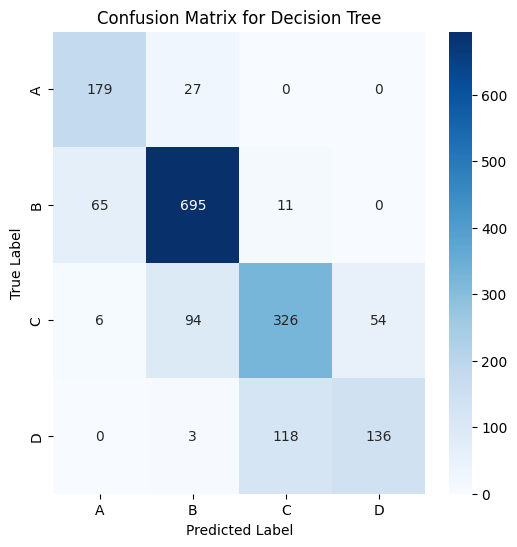

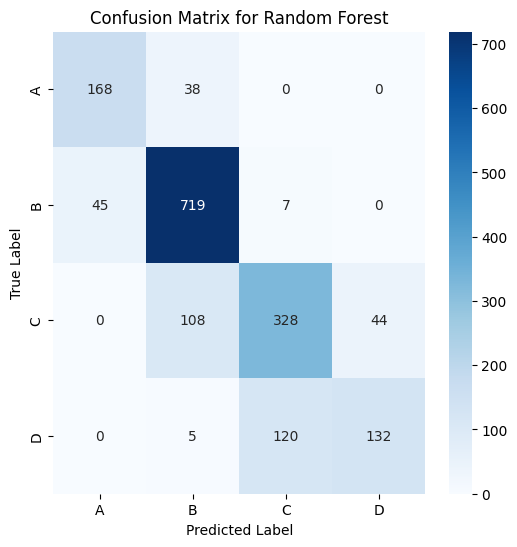

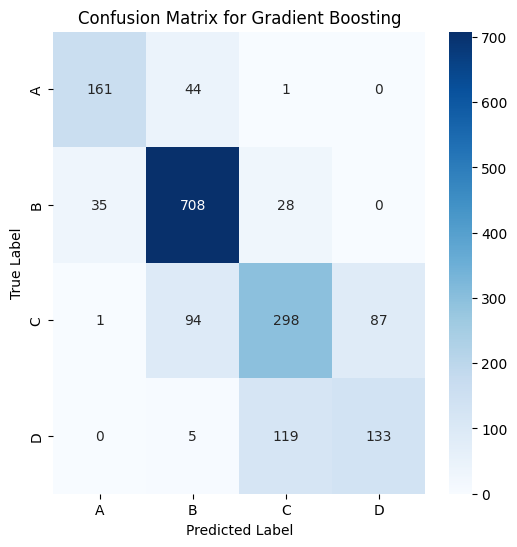

In [ ]:
for model, name in zip(
    [best_dt, best_rf, best_gb], ["Decision Tree", "Random Forest", "Gradient Boosting"]
):
    if model == best_gb:
        cm = confusion_matrix(y_test, model.predict(X_test_imputed)) # gb required imputed dataset
        plt.figure(figsize=(6, 6))
        sns.heatmap(
           cm,
           annot=True,
           fmt="d",
           cmap="Blues",
           xticklabels=model.classes_,
            yticklabels=model.classes_,
         )
    else:
        cm = confusion_matrix(y_test, model.predict(X_test)) # dt and rf accept missing values
        plt.figure(figsize=(6, 6))
        sns.heatmap(
           cm,
           annot=True,
           fmt="d",
           cmap="Blues",
           xticklabels=model.classes_,
            yticklabels=model.classes_,
         )

    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### **2.3 Model Explainability with SHAP & AutoML using FLAML**
#### **SHAP Value Analysis**



SHAP Summary Plot (Mean Across All Classes)


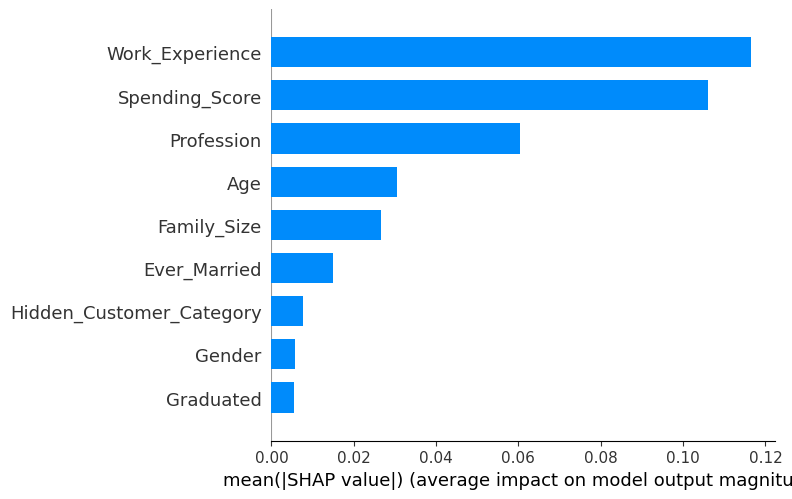

In [ ]:
# Sample a small subset of X_test
small_X_test = X_test.sample(n=100, random_state=42)

# Explain the Random Forest Model
explainer_rf = shap.TreeExplainer(best_rf)

shap_values_rf = explainer_rf.shap_values(small_X_test)
shap_values_mean = np.mean(np.abs(shap_values_rf), axis=2)

print("SHAP Summary Plot (Mean Across All Classes)")
shap.summary_plot(
    shap_values_mean, small_X_test, plot_type="bar", feature_names=small_X_test.columns
)

**Question:** Briefly explain the most influential predictors for customer segmentation, based on SHAP value.

**Frank Answer**

<u>Most Impactful predictors:</u>

* Most influencial predictor is work experience with an impact score 0.12
* 2nd impactful predictor is personal spending with an impact score 0.11
* 3rd impactful predictor is profession with an impact score 0.06

Income factors henerally impact on personal spending, which is the key factor driving businesses to segment their customers. Customers having high-spending capacity is of course the marketing target.

**Another point: workexp and profession may be highly correlated, next they together tell one's spending pattern. Mid-career, high-paid professions like enginners and doctors tend to live high-spending life styles**

<u>Least Imopactful predictors:</u>

* College graduated is the least impact predicgtor with impact score<0.01
* Gender is the 2nd least impact predicgtor with impact score<0.01
* Married is also one of the low impact predictor with score 0.01.

**Another point: graduated and male are already the dominant values among samples. The variances along these variables are pretty low, thus low impact score may not tell true stories behind these factors. Married can be low impact due to fact that non-married person may be less cost-concerned than married ones.**


#### **FLAML AutoML for Multi-Class Classification**  
Train models using **FLAML AutoML**, an efficient and lightweight AutoML framework.  


**------self note------**

Models in FLAML below includes (see report log):

* **lgbm**: Light Gradient Boosting Model: a tree-based, gradient boosting model in the ensemble learning family, with a core GBDT algorithm. Light means it focuses on sopeed and efficiency.
* **sgd**: Stochastic Gradient Descent Model, not a ML rather a optimization algorithm to train ML models. It uses a single random (stochastic) example to train, then updates by gradient from single examples.
* **xgboost**: Extreme Gradient Boosting Model. Like gb and lgb, xgboost is also a tree-based, gradient boosting model in the ensemble learning family, with a error-targeting GBDT algorithm.
* **extra_tree**: Extreme Randomized Trees Algorithm. It is ensemble family model on a collection of decision trees. Random features and random split point.
* **rf**: Random Forest Model. Optimizes split point on features from random feature set.
* **xgb_limitdepth** An xgb mnodel with a intentionally limited depth. Same model algorithm as xgb.
* **lrll**: Logistic Regression (LR) with L1 Regularization (L1 / Lasso). A logistic regression with LASSO (penalty) factor.

**------end note------**

In [ ]:
# Initialize FLAML AutoML
automl = AutoML()

# Train AutoML with time limit
automl.fit(X_train, y_train, task="classification", time_budget=300)

# Get predictions from the best model
y_pred_flaml = automl.predict(X_test)

# Evaluate model performance
print("FLAML AutoML Accuracy:", accuracy_score(y_test, y_pred_flaml))
print(
    "FLAML AutoML Classification Report:\n", classification_report(y_test, y_pred_flaml)
)

# Print the best model selected by FLAML
print("\nFLAML AutoML Best Model:", automl.model.estimator)

[flaml.automl.logger: 04-10 20:40:41] {1728} INFO - task = classification
[flaml.automl.logger: 04-10 20:40:41] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 04-10 20:40:41] {1838} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 04-10 20:40:41] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 04-10 20:40:41] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-10 20:40:43] {2393} INFO - Estimated sufficient time budget=16877s. Estimated necessary time budget=391s.
[flaml.automl.logger: 04-10 20:40:43] {2442} INFO -  at 1.8s,	estimator lgbm's best error=1.0509,	best estimator lgbm's best error=1.0509
[flaml.automl.logger: 04-10 20:40:43] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-10 20:40:43] {2442} INFO -  at 2.5s,	estimator lgbm's best error=1.0509,	best estimator lgbm's best error=1.0509
[flaml.automl.logger: 04-10

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 04-10 20:40:48] {2442} INFO -  at 7.2s,	estimator sgd's best error=1.2044,	best estimator lgbm's best error=0.8952
[flaml.automl.logger: 04-10 20:40:48] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 04-10 20:40:52] {2442} INFO -  at 11.0s,	estimator lgbm's best error=0.6403,	best estimator lgbm's best error=0.6403
[flaml.automl.logger: 04-10 20:40:52] {2258} INFO - iteration 5, current learner xgboost
[flaml.automl.logger: 04-10 20:40:53] {2442} INFO -  at 12.7s,	estimator xgboost's best error=1.1925,	best estimator lgbm's best error=0.6403
[flaml.automl.logger: 04-10 20:40:53] {2258} INFO - iteration 6, current learner xgboost
[flaml.automl.logger: 04-10 20:40:56] {2442} INFO -  at 15.5s,	estimator xgboost's best error=1.1925,	best estimator lgbm's best error=0.6403
[flaml.automl.logger: 04-10 20:40:56] {2258} INFO - iteration 7, current learner extra_tree
[flaml.automl.logger: 04-10 20:40:57] {2442} INFO -  at 15.7s,	estimator extra_tree'

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 04-10 20:45:43] {2442} INFO -  at 302.3s,	estimator lrl1's best error=0.9878,	best estimator lgbm's best error=0.5306
[flaml.automl.logger: 04-10 20:45:44] {2685} INFO - retrain lgbm for 0.6s
[flaml.automl.logger: 04-10 20:45:44] {2688} INFO - retrained model: LGBMClassifier(colsample_bytree=0.8352999033974755,
               learning_rate=0.06002746787115943, max_bin=255,
               min_child_samples=5, n_estimators=125, n_jobs=-1, num_leaves=20,
               reg_alpha=0.0195153320494843, reg_lambda=0.0039556433643895186,
               verbose=-1)
[flaml.automl.logger: 04-10 20:45:44] {1985} INFO - fit succeeded
[flaml.automl.logger: 04-10 20:45:44] {1986} INFO - Time taken to find the best model: 215.71847939491272
FLAML AutoML Accuracy: 0.7987164527421237
FLAML AutoML Classification Report:
               precision    recall  f1-score   support

           A       0.75      0.91      0.82       206
           B       0.84      0.91      0.88       771
  

**Question:** Did FLAML AutoML provide better performance compared to manually tuned models? Briefly explain.

**Frank Answer:**

Model______Accuracy_________________Efficiency________

dt_______0.779463243873979_________9 seonds________

rf________0.7858809801633606________2 minutes_______

gb_______0.7584597432905484________66 seconds______

flaml_____0.7987164527421237________5 minutes_______

Conclusion:

FLAML produces marginally better accuracy, but cost a much longer time.


 # Short-Answer Questions

* Question 1 : You are part of the marketing team at a subscription-based service (e.g., streaming platform). The goal is to predict whether a user will subscribe to a premium plan based on their usage patterns and demographics. You’re using a machine learning model to predict subscription likelihood (Class 1: Subscribe, Class 0: No Subscribe).

**How would you prioritize precision or recall for a subscription service when targeting users for a premium plan?**

**Frank Answer**

* **Precision** = TP / (TP + FP)

High precision means an efficient targeting in which most users targeted do convert, and there is few waste targeting. With a high precision, I minimize wasted effort on users who won't upgrade (False Positives). Like in archery, precision means that most of my shots are on the target, anf few shots are off the target (wasted).

* **Recall** = TP / (TP + FN)

High recall means an sensitive identification on most of the good/potential customers out there, recalling FN represents a real positive customer who is falsely dubbed negative by my model. The higher the Recall rate, the lower I will miss/forego an good opportunity. In this end, I like to use **Sensitivity** instead of Recall to name this rate. The word recall in reality often represents a wrong product to take back for service, a term we always want to minimize.

For premium plan marketing, the customers should come in with high pay values. Thus, missing an opportunity is more significant than wasting efforts (cost of contact). I will focus on **Recall/Sensitivity**.

**------self note------**

Revisit the expecrted value of targeting, **E[V|T,X]** &#9552; **E[V|T=1,X]** &mdash; **E[V|T=0,X]**, when:
* Stay:1 = Churn:0 = real_Positive
* Churn:1 = Stay:0 = real_Negative
* Targeting:1  = predict_Positive
* Targeting:0  = predict_Negative

The value has two equivalent expressions (Pr is probability):

- ( Pr(C=0|T=1,X) &mdash; Pr(C=0|T=0,X) ) &sdot; E[Vs|X] &mdash; Cost, OR
- ( Pr(C=1|T=0,X) &mdash; Pr(C=1|T=1,X) ) &sdot; E[Vs|X] &mdash; Cost

Let's name the measures:
- **C=0|T=1** is customer no churn while targeting::::::::::::Pr &#9552; TP/(TP+FP) &#9552; **Precision**
- **C=0|T=0** is customer no churn while not targeting:::::Pr &#9552; FN/(TN+FN) &#9552; **1 &mdash; nPrecision**,  
with **nPrecission** same as defined below.
- **C=1|T=1** is customer churn while targeting::::::::::::::::::Pr &#9552; FP/(TP+FP) &#9552; **1 &mdash; Precision**
- **C=1|T=0** is customer churn while not targeting:::::::::::Pr &#9552; TN/(TN+FN) &#9552; **nPrecision**,  
with **nPrecission** is the precission in predicting the non-customers.

Reduce the two expressions, result in same thing:

- (Pr(C=0|T=1,X)&mdash;Pr(C=0|T=0,X))&sdot;E[Vs|X] &mdash; Cost
&#9552; (**Precision** + **nPrecision**&mdash;1) &sdot; E[Vs|X] &mdash; Cost
- (Pr(C=1|T=0,X)&mdash;Pr(C=1|T=1,X))&sdot;E[Vs|X] &mdash; Cost
&#9552; (**Precision** + **nPrecision**&mdash;1) &sdot; E[Vs|X] &mdash; Cost

Value of a targeting model can be understood as the customer value moderated by total precissions in excess of the targeting cost. In a constant prediction model, **Total Precision** &#9552; **Precision** + **nPrecision** is always 1. Thus, value of customer is always **0**.

Note: **Total precision** is 100% correlated with **Accuracy**, yet they are not the same.

* 1 ≲ **Total precision** &#9552; **Precision** + **nPrecision**
 ≲ 2, with **≲** meaning <u>generally no less/more than</u>.
* 0 < **Accuracty** &#9552; (TP+TN) / (TP+TN+FP+FN) ≲ 1.


**------end note------**

-------

* Question 2: You are working for an e-commerce company and have built a classification model to segment customers into high, medium, and low-value groups based on their likelihood of making future purchases (Class 1: High-Value, Class 2: Medium-Value, Class 3: Low-Value).

**Is it likely that data imbalance issues will occur, and what precautions should be taken when interpreting the results?**

**Frank Answer**

It is likely that data imbalance will occur. When there is high value segment, it is likely the segment copntains very few customers. Generally, most customers are low value, some are medium value. Only if the segmentation is based on percentile instead of $value, the data imbalance may be unlikely.

* To split test and train or into folds, set stratify=1.
* To use all measures in evaluation: **accuracy, preceision, recall**, and **f1 core**. I may also use **nPrecision**.

**------Gemini note------**

Based on typical customer behavior and value distributions in e-commerce and many other industries, the likely distribution of these classes will be highly skewed or imbalanced. The distribution usually follows a pattern similar to the Pareto Principle (the 80/20 rule), although the exact ratio varies:

**Low-Value**: This class is the largest group, often comprising a significant majority of the customer base (e.g., 50% - 80% or even more). This includes one-time buyers, infrequent purchasers, inactive users, or those browse without buying much.

**Medium-Value**: This group is smaller than the Low-Value group but larger than the High-Value group. Its size is very dependent on how the thresholds are defined but might fall in the range of 15% - 35% of customers. These are regular but not big spending customers.

**High-Value**: This class is the smallest group, representing the top few percentiles of your customer base (e.g., 5% - 15%). These are your loyal, high-spending, frequent customers who drive a disproportionately large amount of revenue or engagement.

In summary, the likely distribution is heavily weighted towards the Low-Value end. This expected imbalance is precisely why standard accuracy is a poor metric for evaluating such a model, and why techniques focusing on class-specific performance (like Precision, Recall, F1-score for the High and Medium classes) and methods for handling imbalanced data are crucial.

**------end gem note------**

- Question 3: Dynamic Pricing Model for Airline Industry
You work at an airline, and the company uses a model to predict whether a customer will purchase a flight ticket at a given price (Class 1: Purchase, Class 0: No Purchase). The price changes dynamically based on factors like demand, booking time, and competitor pricing.

**How would you adjust your model's decision threshold to optimize for maximum profit in this dynamic pricing scenario? What considerations should you take into account when setting this threshold?**

**Frank Answer**

In dynamic pricing, I will use the model's probability output directly to estimate demand at various price points and calculate Expected Profit, than choose the price that optimizes the profit for certian customer X

* E(P) = Pr(Purchase=1|P, X) * (P - C)

**------Gemini note------**

Airline dynamic pricing is a complex system known as Revenue Management (**RM**) or Yield Management, with objective to maximize the total revenue generated from each flight by selling seats to the right customers, at the right time, and for the right price.

* **Total Revenue on Flight <i>f</i>** &#9552; **R<sub>f</sub> ( <i>X</i>, <i>t</i>, <i>P</i> )**

**Perishable Supply**: An airline has a fixed number of seats on any given flight (the supply). This supply is perishable. Once the plane takes off, an empty seat generates zero revenue. However, demand for those seats fluctuates significantly based on many factors.

**Fare Classes**: Airlines divide the seats in each cabin (Economy, Business, First) into multiple "fare classes" or "buckets," often represented by letters (e.g., Y, M, K, L, Q for Economy; J, C, D for Business). Each fare class has a different price point and associated rules (e.g., refundability, change fees, baggage allowance, miles earned). There are only a limited number of seats allocated to each class on any given flight.

**Dynamic Inventory Management**: This is the core of the system. **RM** systems constantly monitor bookings and forecast future demand. Based on this, they dynamically adjust the availability of seats in the different fare buckets:

* Early Bookings </p>
Cheaper fare classes are available further in advance to attract price-sensitive leisure travelers and establish a base load factor.

* As Cheaper Classes Filled </p>
Once sold, that class closes, and customers are only offered seats from the next available, more expensive classes.

* Demand Monitoring </p>
If demand for a flight is stronger than forecasted, RM might close cheaper classes sooner. If demand is weaker, it might reopen cheaper classes closer to the departure date to stimulate sales.

**Key Factors Influencing Price/Availability**:</p>
* Time to Departure</p>
Prices generally increase as the departure date gets closer because business travelers (less price-sensitive) tend to book later, and options diminish.

* Demand Forecasting</p>
Using historical booking data, seasonality, day of the week, special events (holidays, conferences), economic conditions, and increasingly machine learning models to predict demand for a specific flight.

* Real-time Booking Pace (Load Factor)</p>
How quickly the flight is filling up compared to historical patterns and forecasts.

* Competition</p>
Actively monitoring and reacting to competitor pricing on the same or similar routes.

* Customer Segmentation</p>
Differentiating travelers by their predicted willingness to pay (e.g., last-minute bookers assumed to be business travelers and repeated inquirers during a period are price sensitive).

* Operational Costs</p>
Factors like fuel costs influence the overall pricing structure.

* Overbooking</p>
Based on historical no-show rates, airlines often sell slightly more seats than available in certain buckets to minimize the chance of flying with empty seats.

In essence, **airline dynamic pricing** is a sophisticated act. Airlines use **RM** systems to constantly adjust the price and availability of seats within different fare classes to maximize revenue from a fixed, perishable inventory by responding to predicted and real-time demand, competition, and customer behavior. More modern systems are moving towards even more granularity. **Continuous pricing** algorithms (often AI/ML-driven) determine optimal price points between traditional fare bucket prices, reacting even dynamically to real-time conditions and customer willingness to pay.

**------end gem note------**

------

* Question 4: You work for an online payment company and are tasked with building a model to identify fraudulent transactions (Class 1: Fraud, Class 0: Legitimate). The dataset contains transaction amounts, user behavior, and historical fraud data.

**How would you use model explainability tools like SHAP or partial dependence plots to communicate the rationale behind the model's decisions to stakeholders who may not be familiar with machine learning?**

**Frank Answer**
To communicate the model decision with stakeholders:

* **Causality, not Correlation**: To talk about **why** a transaction was flagged (or not flagged), not about the intricate **math** behind the model.
* **Visualize Causalities**: SHAP and Partial Dependence Plots provide plots that are much more intuitive than raw numbers.
* **Relate to Action**: Explain how understanding these factors helps improve fraud prevention strategies.
* **Overall & Specificity**: Tell both overall trends and reasons for specific decisions.
* **Communicate Business-ly**: Speak features and model outputs into common business concepts like <i>unusual login</i>, <i>high fraud score</i>, not **un_lgin** and **hy_fr_scr** directly from the model.

-----------

**Question 5:
Supervised learning is widely used in business applications to make data-driven decisions.**

**Task:**


1. Identify a real-world business case where supervised learning can be applied.
Define the outcome variable (target variable) for this problem.

2. Explain how you would evaluate the model's performance:
Which evaluation metrics (e.g., Accuracy, Precision, Recall, F1-score, RMSE, AUC-ROC) would you choose?

3. Justify why those metrics are the most appropriate for your chosen business case.

💡 Hint: Consider cases like customer churn prediction, fraud detection, loan default prediction, or sales forecasting. Think about the cost of errors and which metric best captures the business objective.

**Frank Answer**

Take a equity investment example: Invesco QQQ. To decide either to Buy (Classification=1) or Sell (Classification=0), this is a binary classification system. Explicitly, I can use Decision Tree to work on this project.

* **Source**: Use Yahoo! Finance to download daily data of **open/high/low/close/volume**. Don't use **adjusted close** because it is only available after close of the day, too late for my daily decisions.

* **Data Columns**: The O/H/L/C/V shall be used to produce other cols in order to predict the next price move. Investors typically perceive the raw price information in terms of **close relative** to open/high/low/previous close, **open relative** to previous close/high/low, **high relative** to open/low/previous high/previous low/previous close, **low relative** to open/previous high/previous low/previous close, **volume relative** to daily close variance/previous volume.

 * 1) Close (X) Cols: c_2_o, c_2_hi, c_2_lo, c_2_b1.
 * 2) Open (X) Cols: o_2_cb1, o_2_hi, o_2_lo.
 * 3) High (X) Cols: <s>(hi_2_o)</s>, hi_2_lo, hi_2_b1, hi_2_lob1, hi_2_cb1.
 * 4) Low (X) Cols: <s>(lo_2_o)</s>, lo_2_hib1, lo_2_b1, lo_2_cb1.
 * 5) Volume (X) Cols: vo_2_cov, vo_2_vob1.
 * 6) Forward Price (Y) Cols: c_2_f1, o_2_cf1, hi_2_cf1, lo_2_cf1.
 * Note 1: c=close, o=open, hi=high, lo=low, vo-volume, b1=backward 1day, f1=forward 1day, cb1 is close of backward 1day, cf1 is close of forward 1day
 * Note 2: x_2_b1 = x_2_<i>x</i> b1, with the second <i>x</i> notion omitted.
 * Note 3: (hi_2_o) and o_2_hi are negatively perfectly correlated, whereas (lo_2_o) and o_2_lo are also negatively perfectly correlated. So, there is no need to duplicate.
 * Note 4: My primary Y is c_2_f1 can be used for a Buy/Hold/Sell decision. Secondarily, hi_2_cf1 can be used when Buy/NotBuy is the decision, and lo_2_cf1 can be used when Sell/NotSell is the decision.
